# EV Demand Profile - Night charge
This was a profile for charging the EV at night ~ 11pm-5am for bulk of charging (6 hr period)

**Author:** Minnie Karanjavala

**Date:** Feburary 20th, 2021

**College:** St Peter's

## Goal:
- to create a EV demand profile for a single vehicle - who's total energy usage over the whole year = annual electricity requirement of an EV
- create a dataset of half hourly power data for the power going into charging a single EV for the whole year

## Plan:
- make a EV demand profile for 1 day 
- assume the profile is unifrom across the year 
- string togther 365 of these profiles 
- calculate the total energy used in 1 year (kWh) by my dataset
- find the total annual energy used by an EV in Kennington
- find a scale factor to make total energy of dataset match that of average Ken EV
- check the final EV demand profile that it looks reasonable (it should be a scaled shown version of the original one which makes sense as the battery does not fully drain everyday)

- maybe check what energy is being given to the EV per day from your plot and check that this matches your assumption 

In [86]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statistics

In [87]:
EV_df = pd.read_csv('../../data/EV_Demand_night_2.csv') 


In [88]:
print(EV_df.head())
EV_df.info()


       Time  Charging Power (kW)
0  12:00 am                 5.04
1  12:30 am                 5.80
2   1:00 am                 6.42
3   1:30 am                 6.78
4   2:00 am                 6.84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 48 non-null     object 
 1   Charging Power (kW)  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


## Plot out EV demand over 24hrs 
- so i can visualise the power charing curve and the time at which it is occuring

In [89]:
EV_df['Time'] = pd.to_datetime(EV_df['Time'])
#EV_df.head(48)
#EV_df['Charging Power (kW)']

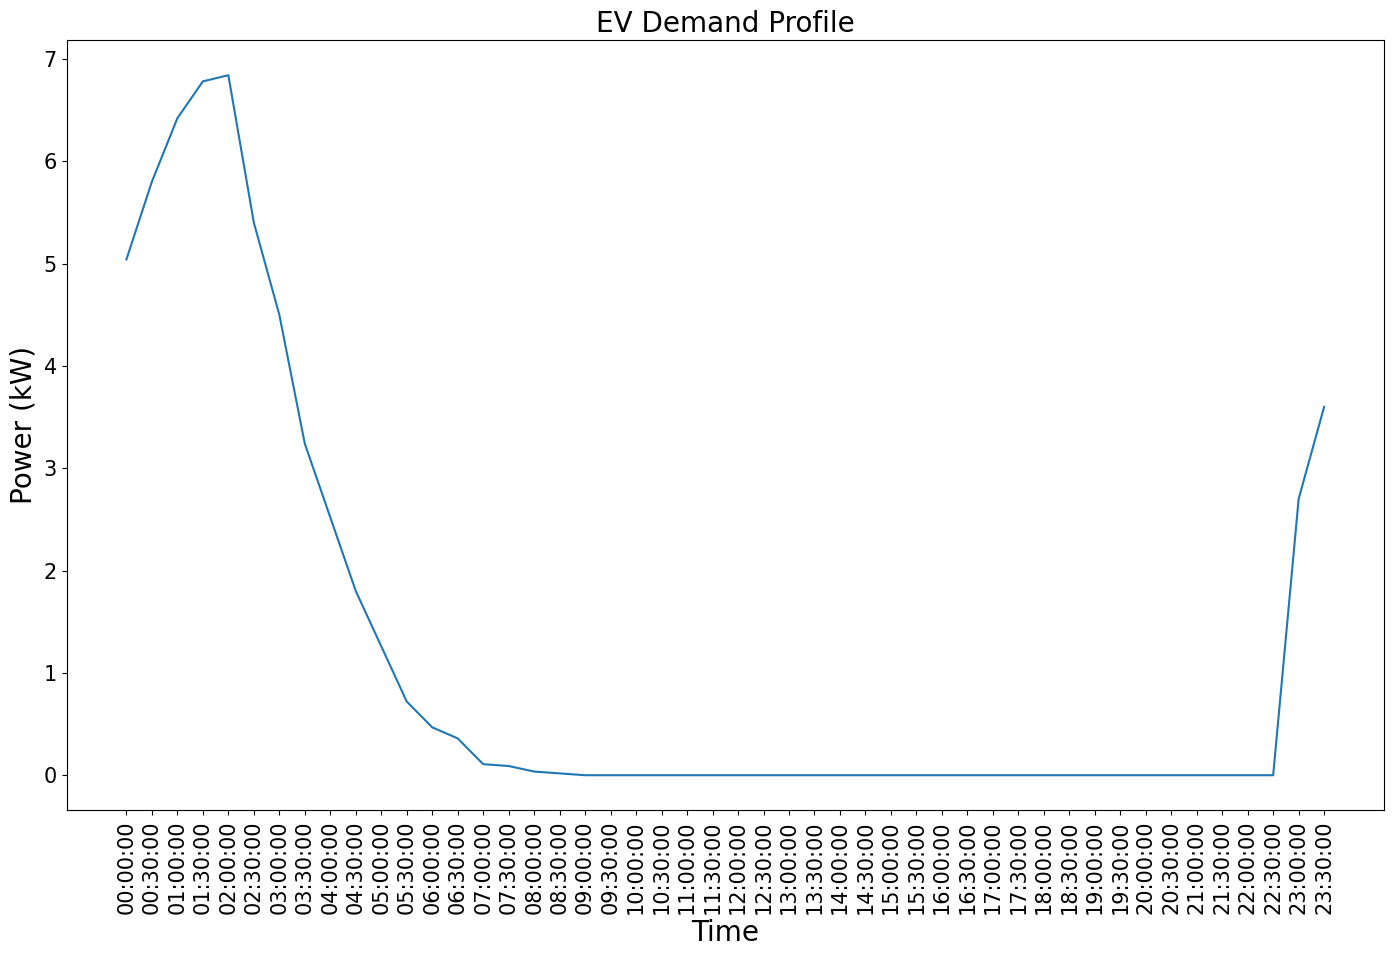

In [90]:
fig, ax = plt.subplots(figsize=(17,10))
#ax.plot(EV_df[:,0],EV_df[:,1])
ax.plot(EV_df['Time'].dt.strftime("%X"),EV_df['Charging Power (kW)'])

ax.set(xlabel="Time",
    ylabel = "Power (kW)",
    title = 'EV Demand Profile');

plt.xticks(rotation=90);

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

ax.tick_params(axis='both', which='major', labelsize=15)

## More readable plot

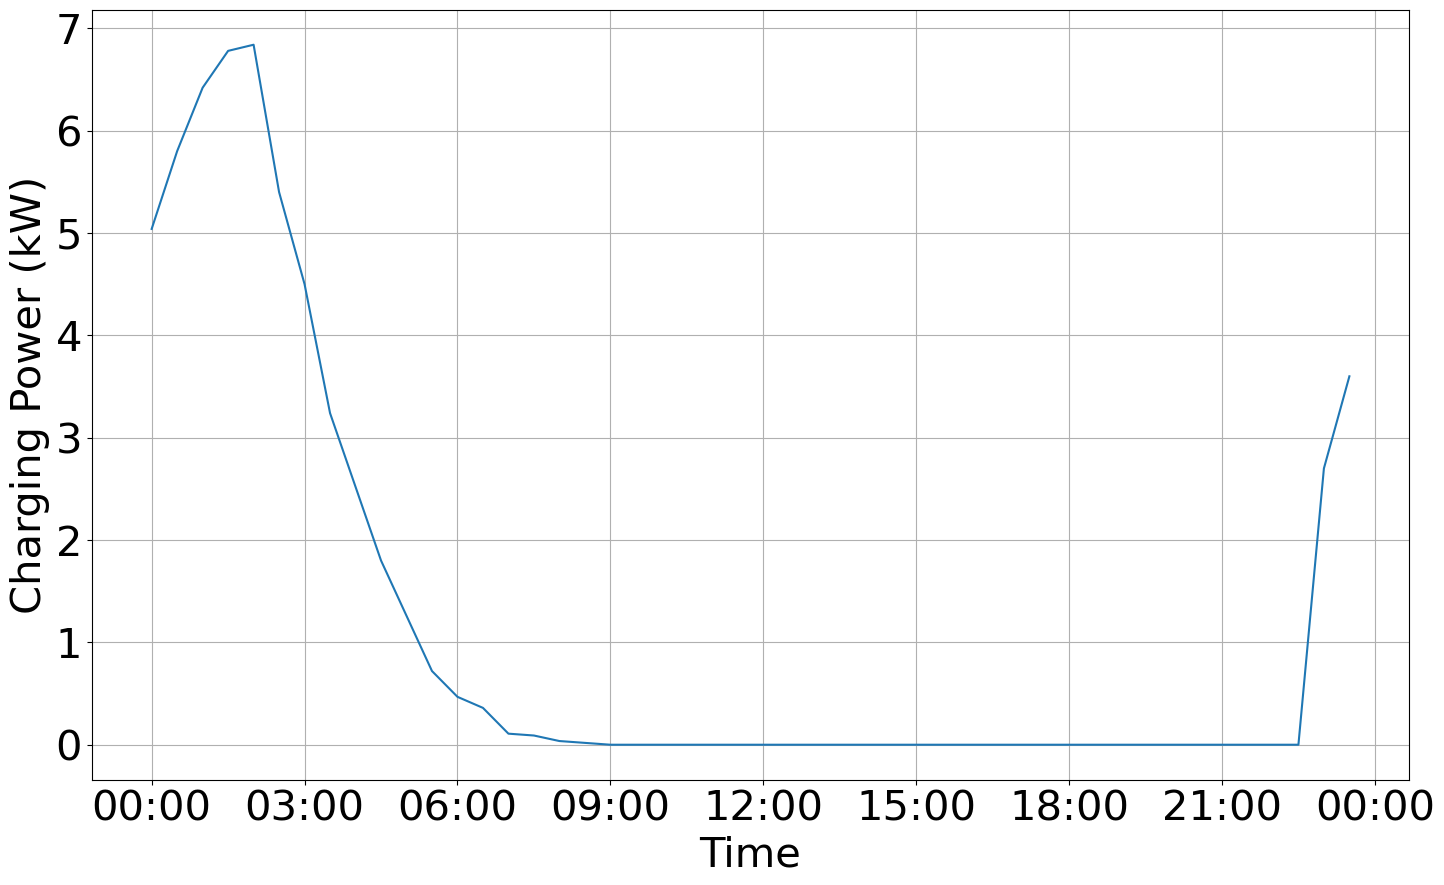

In [91]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(17,10))

x_axis = pd.date_range('2020' + '-01-01', periods = 48, freq= '0.5H') 
myFmt = mdates.DateFormatter('%H:%M')       # format the times into Hour:Minute format
#plt.gcf().autofmt_xdate()                   # automatic rotation of the axis plots
   

ax.plot(x_axis,EV_df['Charging Power (kW)'])

ax.set_ylabel('Charging Power (kW)')
ax.set_xlabel('Time')
#ax.set_title('EV Demamd')
ax.xaxis.set_major_formatter(myFmt)   # apply HH:MM format to the x axis data
ax.grid(b=True)

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.title.set_size(430)

ax.tick_params(axis='both', which='major', labelsize=30)

### Concatenate 365 daily EV demand Profiles


In [92]:
print(EV_df.head())
EV_df.info()

                 Time  Charging Power (kW)
0 2021-04-13 00:00:00                 5.04
1 2021-04-13 00:30:00                 5.80
2 2021-04-13 01:00:00                 6.42
3 2021-04-13 01:30:00                 6.78
4 2021-04-13 02:00:00                 6.84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 48 non-null     datetime64[ns]
 1   Charging Power (kW)  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [93]:
# concatenate 365 daily EV demand profiles
EV_annual_demand = np.array([])

for i in range(365):
    EV_annual_demand = np.append(EV_annual_demand,EV_df['Charging Power (kW)'].values)  #kW

print(EV_annual_demand.size)

17520


In [94]:
# find the total energy used over the year

# annual energy (kWh), EV_annual_demand (kW), 0.5 hours <-- energy = power*time
annual_energy = sum(EV_annual_demand)*0.5   # kWh
print(annual_energy)

10530.250000000246


In [95]:
# electricity requirement for one EV for a year
elec_per_mile = 0.238   # kWh/mile
avg_mileage = 7400      # miles 
actual_annual_elec = elec_per_mile*avg_mileage      #kWh

print(actual_annual_elec)

1761.1999999999998


In [96]:
SF = actual_annual_elec/annual_energy   #unitless as it's a ratio

# this is a 356*48 array with units kW
scaled_annual_energy = SF*EV_annual_demand  # this will scale the total energy used by EV over year to 'actual_annual_elec' value 

print(sum(scaled_annual_energy)*0.5)    # kWh

1761.1999999999307


# Sanity check
## Find the energy used to charge EV in 1 day

In [97]:
daily_energy = sum(scaled_annual_energy[0:48])*0.5  #kWh = the electriciy used to charge the EV in one day 

battery_capacity = 40 #kWh

print('Energy used per day by EV: ' + str(daily_energy) + 'kWh')
print("The % of battery charged up per night is: " + str((daily_energy/battery_capacity)*100) + '%')

Energy used per day by EV: 4.825205479451943kWh
The % of battery charged up per night is: 12.063013698629858%


- From this if we assume that the usage of the EV is uniform throughout the year then we would expect 
- 20 miles are driven a day which makes sense if total annual mileage is 7400 miles (then 7400/365 = 20.3 miles/day)

- so at the end of every day you only need to charge the EV's battery up by 12% cos assuming that it is fully charged at the start of the day then on an average day when you drive ~20 miles it will only use ~12% of the EV's total range hence only 12% of the battery's energy is used up.

## Q: what does the power curve look like for such a small amount of charging required?
ANSWER:
- i think the charging will be done over a shorter period of time (as opposed to a tiny bit of charge going in all night?). The power rating for a Nissan Leaf battery is 6.6kW, currently the max power reached during the night charge is ~1.2kWh which is 1.2/6.6 = 18% of the max power. 
- the charging curve I have in my notes of Telsa 3 charging from 68%->96% shows that 50kW/120kW = 40% of the max power is reached, this is when the battery is being charged up 28%. In this example I am charging the EV up about half this much 28/2 = 14% (i do it to 12%) hence I think it is reasonable to assume that the max power reached during the charge will be ~40/2 = 20% of the max power (i do it to 18% of max power here).





## Write output to CSV file

In [98]:
# convert numpy array into dataframe
scaled_EV_df = pd.DataFrame(scaled_annual_energy, columns=['Charging Power (kW)'])
print(scaled_EV_df.info())
#print(scaled_EV_df[0:48])

#write dataframe to csv file
scaled_EV_df.to_csv('EV_Demand_night_1.csv',index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Charging Power (kW)  17520 non-null  float64
dtypes: float64(1)
memory usage: 137.0 KB
None


# Plot the demand profiles

This allows me to visualise the load and sanity check it.

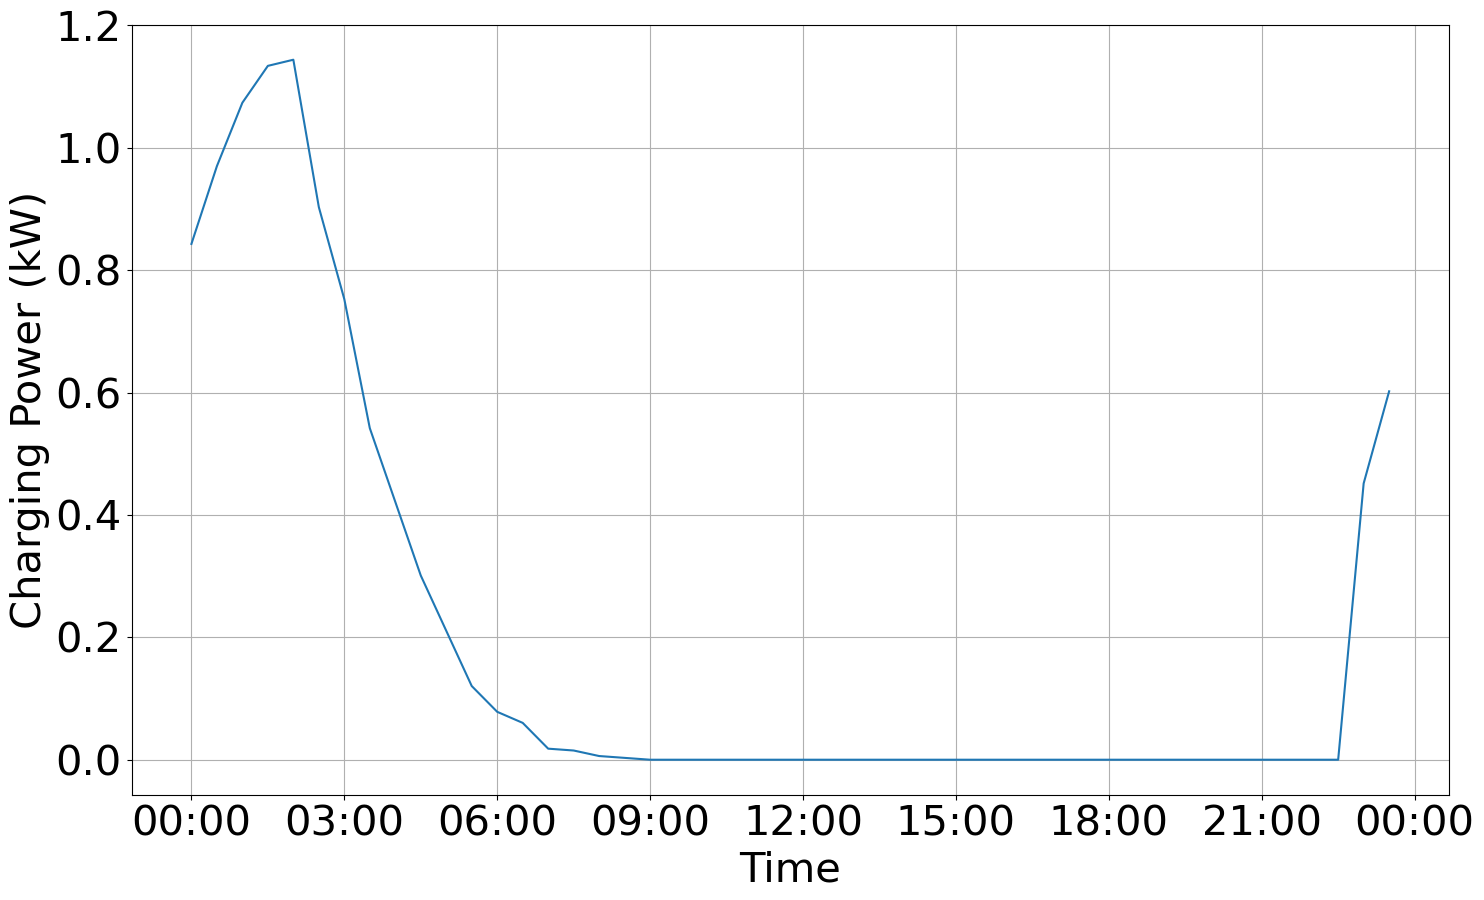

In [99]:
### IF WHEN I RUN THIS CELL IT GIVES ME A PLOT OF 2 HORIZONTAL LINES THEN RUN ALL THE CELLS FROM START AND PLOT WILL BE FIXED 

plt.style.use('default')
fig, ax = plt.subplots(figsize=(17,10))
#ax.plot(EV_df[:,0],EV_df[:,1])


x_axis = pd.date_range('2020' + '-01-01', periods = 48, freq= '0.5H') 
myFmt = mdates.DateFormatter('%H:%M')       # format the times into Hour:Minute format
#plt.gcf().autofmt_xdate()                   # automatic rotation of the axis plots
   

ax.plot(x_axis,scaled_EV_df[0:48])

ax.set_ylabel('Charging Power (kW)')
ax.set_xlabel('Time')
#ax.set_title('EV Demamd')
ax.xaxis.set_major_formatter(myFmt)   # apply HH:MM format to the x axis data
ax.grid(b=True)

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.title.set_size(30)

ax.tick_params(axis='both', which='major', labelsize=30)


## How to add my own date column to a dataframe
You can just ignore this it was just me testing out a panda feature. 

In [100]:
scaled_EV_df = pd.DataFrame(scaled_annual_energy, columns=['Charging Power (kW)'])
scaled_EV_df['Date'] = pd.date_range(start='1/1/2020', periods=len(scaled_EV_df), freq='0.5H')


#scaled_EV_df['date'] = pd.DatetimeIndex(freq='D', normalize=True, )

# print(scaled_EV_df.head())
# print(scaled_EV_df.info())